In [161]:
from keras.layers import Input, Dense, regularizers
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.layers import LSTM, RepeatVector, Lambda
import tensorflow as tf
from keras import objectives

## Keras Autoencoder Example

web: https://blog.keras.io/building-autoencoders-in-keras.html

In [31]:
# encoder - decoder Model
encoding_dim = 32

input_size = 784

input_img = Input(shape=(input_size,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [32]:
# just encoder
encoder = Model(input_img, encoded)

In [33]:
# just decoder
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [34]:
# configure the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Data

In [35]:
(x_train, _), (x_test, _) = mnist.load_data()

In [36]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [37]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3686 - val_loss: 0.2726
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2655 - val_loss: 0.2552
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2458 - val_loss: 0.2341
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2268 - val_loss: 0.2169
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2118 - val_loss: 0.2038
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.2004 - val_loss: 0.1940
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1917 - val_loss: 0.1864
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1847 - val_loss: 0.1800
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1785 - val_loss: 0.1740
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1730 - val_loss: 0.1688

In [38]:
# encode decode test
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

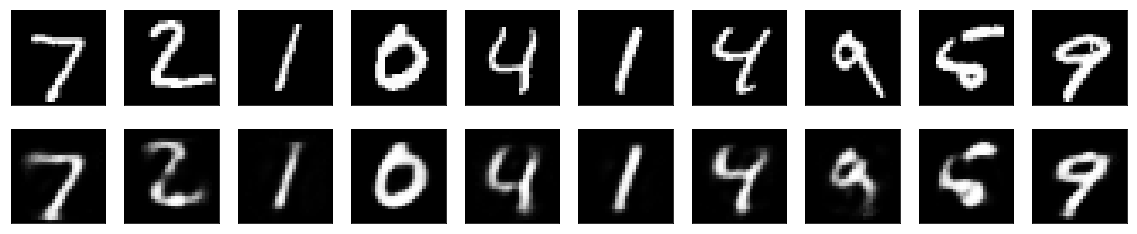

In [97]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

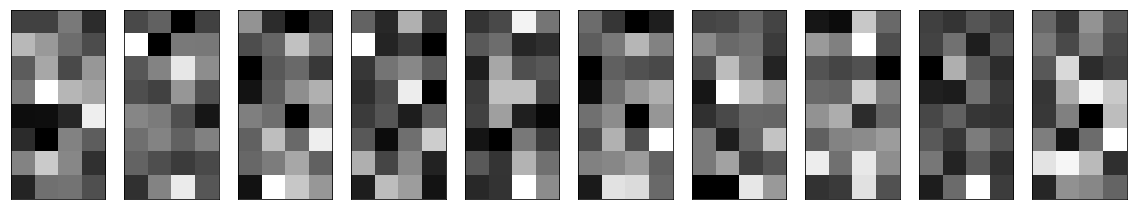

In [44]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 2).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep Autoencoder

In [45]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [46]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.3691 - val_loss: 0.2633
Epoch 2/100
60000/60000 [==============================] - 4s - loss: 0.2578 - val_loss: 0.2499
Epoch 3/100
60000/60000 [==============================] - 4s - loss: 0.2419 - val_loss: 0.2315
Epoch 4/100
60000/60000 [==============================] - 4s - loss: 0.2210 - val_loss: 0.2119
Epoch 5/100
60000/60000 [==============================] - 3s - loss: 0.2066 - val_loss: 0.1982
Epoch 6/100
60000/60000 [==============================] - 4s - loss: 0.1920 - val_loss: 0.1857
Epoch 7/100
60000/60000 [==============================] - 4s - loss: 0.1835 - val_loss: 0.1793
Epoch 8/100
60000/60000 [==============================] - 4s - loss: 0.1783 - val_loss: 0.1746
Epoch 9/100
60000/60000 [==============================] - 4s - loss: 0.1739 - val_loss: 0.1702
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.1684 - val_lo

60000/60000 [==============================] - 3s - loss: 0.1020 - val_loss: 0.1004
Epoch 86/100
60000/60000 [==============================] - 3s - loss: 0.1019 - val_loss: 0.1024
Epoch 87/100
60000/60000 [==============================] - 3s - loss: 0.1016 - val_loss: 0.1004
Epoch 88/100
60000/60000 [==============================] - 3s - loss: 0.1014 - val_loss: 0.1003
Epoch 89/100
60000/60000 [==============================] - 4s - loss: 0.1012 - val_loss: 0.0998
Epoch 90/100
60000/60000 [==============================] - 3s - loss: 0.1010 - val_loss: 0.0994
Epoch 91/100
60000/60000 [==============================] - 4s - loss: 0.1009 - val_loss: 0.0997
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.1006 - val_loss: 0.1005
Epoch 93/100
60000/60000 [==============================] - 3s - loss: 0.1005 - val_loss: 0.0997
Epoch 94/100
60000/60000 [==============================] - 4s - loss: 0.1003 - val_loss: 0.0991
Epoch 95/100
60000/60000 [=================

In [77]:
decoded_imgs3

array([[ 15.589921  ,   3.93734717,   6.4958601 , ...,  13.63320732,
          4.76789665,  14.85187149],
       [  7.16019535,   1.41556644,   5.8608284 , ...,   6.45063877,
          3.65147018,   2.5957129 ],
       [ 14.90197754,   4.19283724,   1.1723845 , ...,   5.59894037,
          5.30244493,   7.4736743 ],
       ..., 
       [ 12.05955696,   0.        ,  10.83940792, ...,   7.47768593,
          8.43527222,   5.57139683],
       [ 14.94555664,   3.88659072,   6.22271299, ...,   8.58422661,
          0.        ,  13.23246956],
       [ 11.61877823,   0.        ,  11.93338585, ...,   0.        ,
         16.40308571,   4.74728727]], dtype=float32)

In [81]:
encoder2 = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-3]

decoder2 = Model(encoded_input, decoder_layer(encoded_input))

decoded_imgs3 = decoder2.predict(encoded_imgs2)

decoded_input2 = Input(shape=(64,))

decoder3 = Model(decoded_input2, autoencoder.layers[-2](decoded_input2))

decoded_imgs4 = decoder3.predict(decoded_imgs3)

decoded_input3 = Input(shape=(128,))

decoder4 = Model(decoded_input3, autoencoder.layers[-1](decoded_input3))

#decoded_input3 = Input(shape=(128,))

#decoder4 = Model(decoded_input3, autoencoder.layers[-1](decoded_input3))

encoded_imgs2 = encoder2.predict(x_test)
decoded_imgs5 = decoder4.predict(decoded_imgs4)

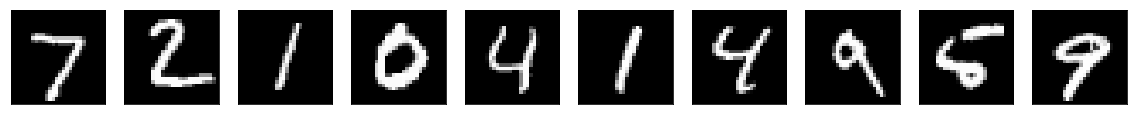

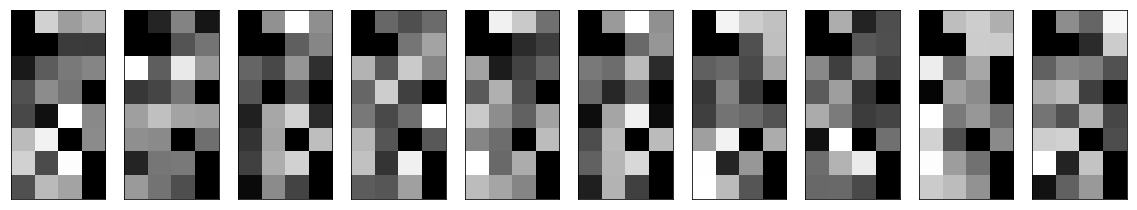

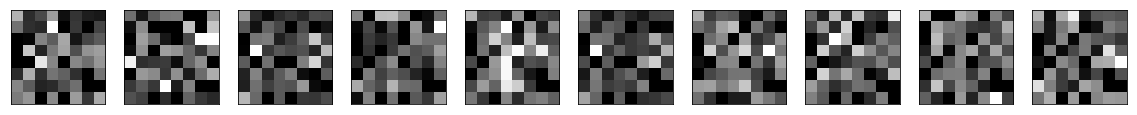

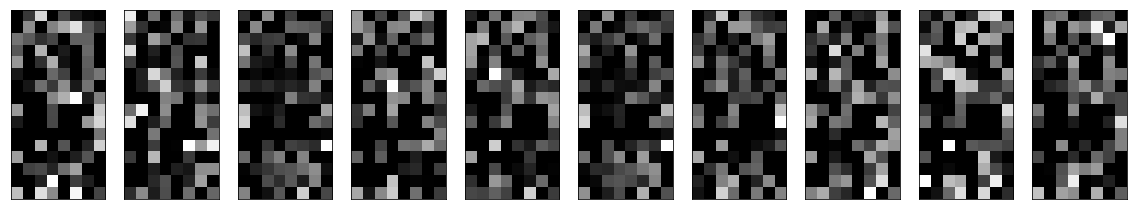

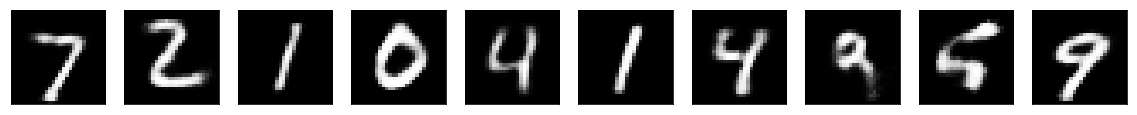

In [116]:
n = 10 
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs2[i].reshape(4, 4 * 2).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs3[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs4[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs5[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional Autoencoder

In [128]:
#  data in 3D format
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [130]:
input_img = Input(shape=(28,28,1))

# conv layer with 3x3 filter
# x = Conv2D(16, (3,3)), activation='relu', padding='same')(encoded)

#pooling layer
# x = MaxPooling2D((2,2), padding='same')(x)

x1 = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x2 = MaxPooling2D((2,2), padding='same')(x1)
x3 = Conv2D(8, (3,3), activation='relu', padding='same')(x2)
x4 = MaxPooling2D((2,2), padding='same')(x3)
x5 = Conv2D(8, (3,3), activation='relu', padding='same')(x4)
encoded = MaxPooling2D((2,2), padding='same')(x5)



x6 = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x7 = UpSampling2D((2,2,))(x6)
x8 = Conv2D(8, (3,3), activation='relu', padding='same')(x7)
x9 = UpSampling2D((2,2,))(x8)
x10 = Conv2D(16, (3,3), activation='relu')(x9)
x11 = UpSampling2D((2,2,))(x10)
decoded = Conv2D(1, (3,3), activation='relu', padding='same')(x11)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [131]:
# needs more than 50 to converge!

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 86s - loss: 0.2846 - val_loss: 0.2210
Epoch 2/50
60000/60000 [==============================] - 88s - loss: 0.2088 - val_loss: 0.2006
Epoch 3/50
60000/60000 [==============================] - 86s - loss: 0.1955 - val_loss: 0.1889
Epoch 4/50
60000/60000 [==============================] - 92s - loss: 0.1877 - val_loss: 0.1850
Epoch 5/50
60000/60000 [==============================] - 90s - loss: 0.1822 - val_loss: 0.1769
Epoch 6/50
60000/60000 [==============================] - 87s - loss: 0.1769 - val_loss: 0.1739
Epoch 7/50
60000/60000 [==============================] - 92s - loss: 0.1752 - val_loss: 0.1723
Epoch 8/50
60000/60000 [==============================] - 79s - loss: 0.1726 - val_loss: 0.1694
Epoch 9/50
60000/60000 [==============================] - 75s - loss: 0.1696 - val_loss: 0.1667
Epoch 10/50
60000/60000 [==============================] - 76s - loss: 0.1673 - val_lo

In [137]:
encoderc = Model(input_img, encoded)

encoded_imgsc = encoderc.predict(x_test)

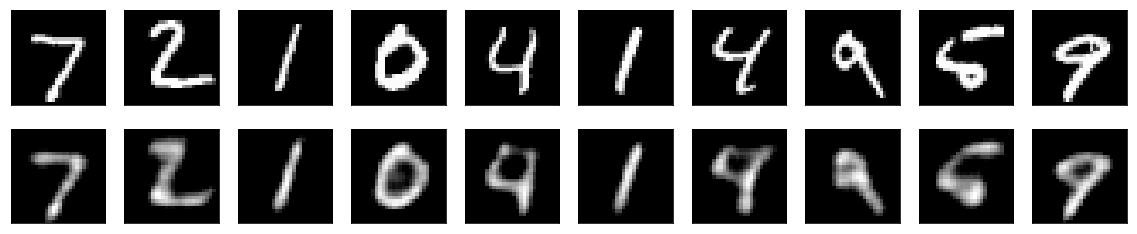

In [139]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

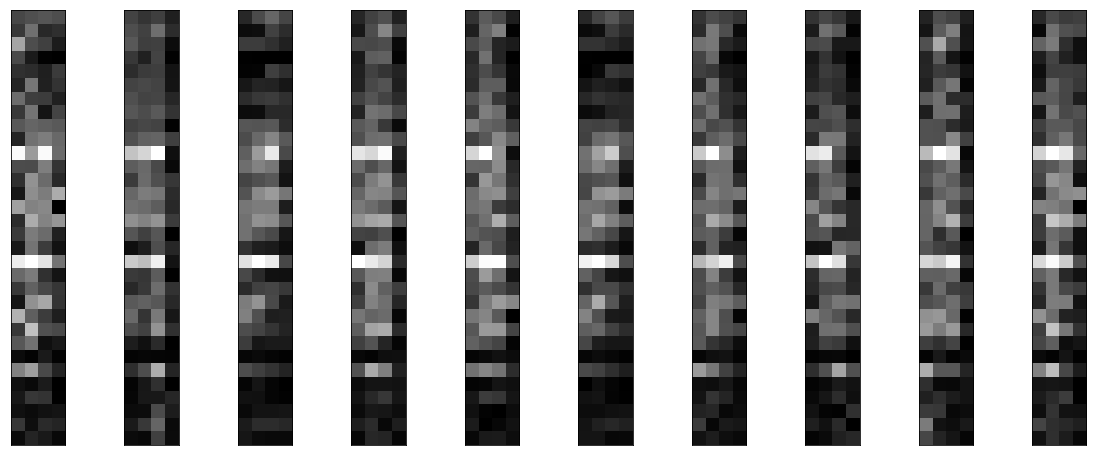

In [140]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgsc[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Seq to Seq Autoencoder

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

### Variational Autoencoders

Learns a latent variable model for its input data
First, an encoder network turns the input samples x into two parameters in a latent space, which we will note z_mean and z_log_sigma. Then, we randomly sample similar points z from the latent normal distribution that is assumed to generate the data, via z = z_mean + exp(z_log_sigma) * epsilon, where epsilon is a random normal tensor. Finally, a decoder network maps these latent space points back to the original input data.

In [143]:
batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

In [144]:
# encoder network
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [150]:
from tensorflow.python.ops import random_ops

def _initializer(shape, dtype=tf.float32, std=None):
     return random_ops.random_normal(shape)

In [154]:
# sample from latent space
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [155]:
# reconstruct points
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [162]:
# 3 models

# end-to-end autoencoder: inputs to reconstructions
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [163]:
def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [164]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s - loss: 0.2944 - val_loss: 0.2628
Epoch 2/50
60000/60000 [==============================] - 8s - loss: 0.2631 - val_loss: 0.2627
Epoch 3/50
60000/60000 [==============================] - 8s - loss: 0.2630 - val_loss: 0.2626
Epoch 4/50
60000/60000 [==============================] - 8s - loss: 0.2630 - val_loss: 0.2627
Epoch 5/50
60000/60000 [==============================] - 8s - loss: 0.2630 - val_loss: 0.2627
Epoch 6/50
60000/60000 [==============================] - 9s - loss: 0.2630 - val_loss: 0.2627
Epoch 7/50
60000/60000 [==============================] - 8s - loss: 0.2630 - val_loss: 0.2626
Epoch 8/50
60000/60000 [==============================] - 12s - loss: 0.2630 - val_loss: 0.2626
Epoch 9/50
60000/60000 [==============================] - 7s - loss: 0.2629 - val_loss: 0.2627
Epoch 10/50
60000/60000 [==============================] - 1224s - loss: 0.2629 - val_loss: 0.

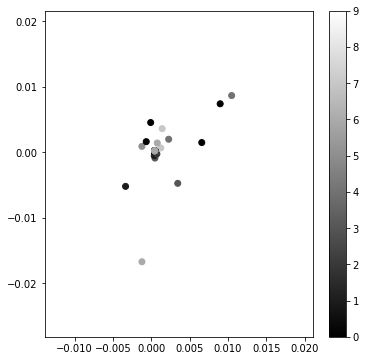

In [167]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

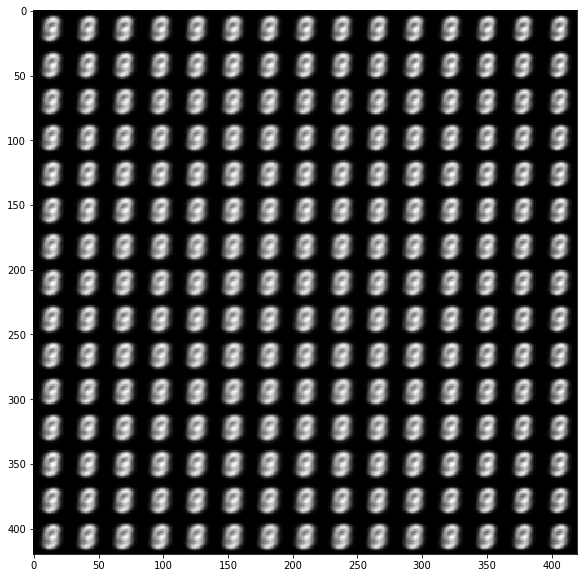

In [168]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * epsilon_std
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()